# Boxplot in Python

## matplotlib Boxplot
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
# df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["target"] = iris.target
print("Dataframe shape:", df.shape, " -> size:", df.size)
print(df.info(verbose = False))
df.head()

Dataframe shape: (150, 5)  -> size: 750
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 5 entries, sepal_length to target
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


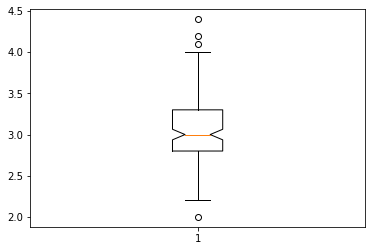

In [80]:
# Basic Boxplot call with some options

# fig = plt.boxplot()
plt.boxplot( df.sepal_width, notch=True, sym="o" )
plt.show()

# other options : labels=["Set 1", "Set 2"], widths = 0.15

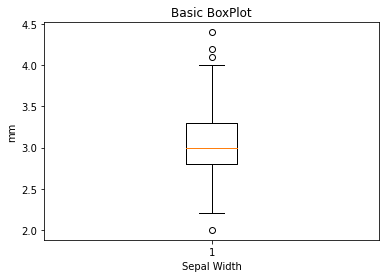

In [81]:
# Using plt.subplots to plot one or several figures in the same window
fig1, ax1 = plt.subplots(figsize=(6,4)) # Creates a figure and a set of subplots (recommended for generating multiple subplots in grids)
ax1.set_title('Basic BoxPlot')
ax1.set_xlabel('Sepal Width')
ax1.set_ylabel('mm')
ax1.boxplot(df.sepal_width)
plt.show()

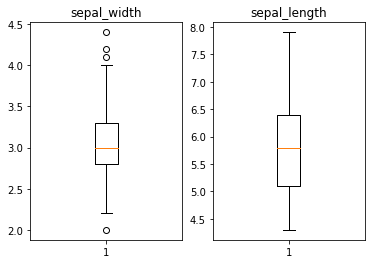

In [86]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,4)) # Creates a figure and a set of subplots (recommended for generating multiple subplots in grids)
ax1.set_title('sepal_width')
ax2.set_title('sepal_length')

ax1.boxplot(df.sepal_width)
ax2.boxplot(df.sepal_length)

plt.show()

C:\Users\urrutiaa\AppData\Local\Temp\FreeCommanderPortableTemp\ipykernel_484\377392266.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


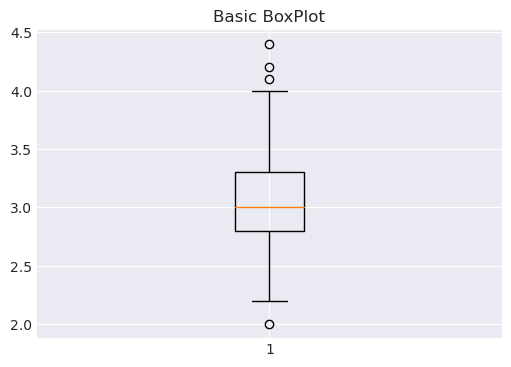

In [101]:
# Using plt.figure
plt.style.use('seaborn-darkgrid')
fig1 = plt.figure("fig1 - plt.figure", figsize=(6,4)) # creates a new figure but wo axes (axes can be added)
# fig1 = plt.figure(figsize=(6,4))
plt.title('Basic BoxPlot') #set a title for the axes
_ = plt.boxplot(df.sepal_width)
fig.show()
plt.style.use('default')

matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns, it returns a tuple (fig, ax), giving a single figure fig with an array of axes ax

## panda Boxplot
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

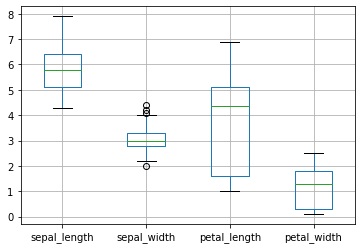

In [38]:

_ = df.boxplot(column=["sepal_length", "sepal_width", "petal_length", "petal_width"])  

## Scaterred Boxplot
https://towardsdatascience.com/scattered-boxplots-graphing-experimental-results-with-matplotlib-seaborn-and-pandas-81f9fa8a1801

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = np.random.default_rng().uniform(60,95,(20,4))
df = pd.DataFrame(dataset, columns=['data1','data2','data3','data4'])
#df.head()
for n in range(1,df.columns.shape[0]+1):
    df.rename(columns={f"data{n}": f"Experiment {n}"}, inplace=True)
df.head()

,Experiment 1,Experiment 2,Experiment 3,Experiment 4
0,82.403899,92.359202,80.006949,84.107002
1,82.346946,72.908323,68.753805,78.636323
2,65.530518,71.170009,86.717650,90.371155
3,66.493585,90.526126,75.329955,82.291303
4,81.862118,82.734764,94.254193,86.299260


In [12]:
# vals : all values
# xs : jittered
vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

names

['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4']

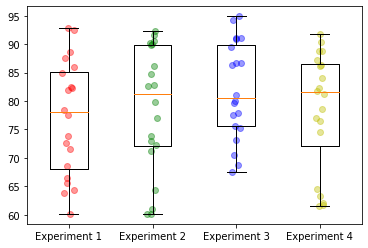

In [13]:
plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()

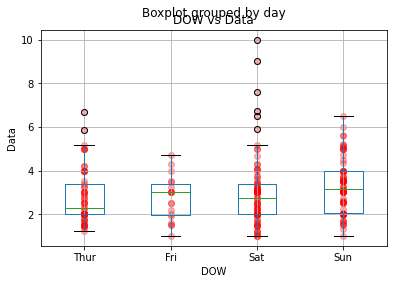

In [37]:
import seaborn as sns
import numpy as np
tips = sns.load_dataset('tips')

axes = tips.boxplot(column="tip", by="day")
axes.set_title("DOW vs Data")
axes.set_xlabel("DOW")
axes.set_ylabel("Data")

for i,day in enumerate(["Thur", "Fri", "Sat", "Sun"]):
    y = tips.loc[tips["day"] == day, "tip"]
    x = np.repeat(i+1, len(y))  # adjust the x data so that Thur will correspond to coordinate 1, Fri to 2, etc
    axes.scatter(x, y, color='r', alpha=0.3)